In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')
df_test=pd.read_csv('Google_Stock_Price_Test.csv')
                    

In [3]:
df_train.shape

(1258, 6)

In [4]:
df_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df_train.tail(5)

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [6]:
df_test.shape

(20, 6)

In [7]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
open_scaled=scaler.fit_transform(df_train[['Open']])

In [10]:
open_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
    open_scaled[0:61,0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656,
       0.08627874])

In [12]:
rows=[]
for i in range(1198):
    r=open_scaled[i:61+i,0]
    rows.append(r)

In [13]:
import numpy as np


In [14]:
data=np.array(rows)

In [15]:
data.shape

(1198, 61)

In [16]:
X=data[:,0:60]

In [17]:
X.shape

(1198, 60)

In [18]:
X=X.reshape(1198,60,1)
X.shape

(1198, 60, 1)

In [19]:
y=data[:,60]

In [20]:
y.shape

(1198,)

In [21]:
#!pip install -U tensorflow

In [22]:
#!pip install tensorflow

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))

In [25]:
model.compile(loss='mean_squared_error')

In [26]:
model.fit(X,y,batch_size=35,epochs=50)

Epoch 1/50
35/35 [==============================] - 56s 1s/step - loss: 0.0647
Epoch 2/50
35/35 [==============================] - 49s 1s/step - loss: 0.0169
Epoch 3/50
35/35 [==============================] - 47s 1s/step - loss: 0.0119
Epoch 4/50
35/35 [==============================] - 42s 1s/step - loss: 0.0109
Epoch 5/50
35/35 [==============================] - 35s 1s/step - loss: 0.0079
Epoch 6/50
35/35 [==============================] - 33s 950ms/step - loss: 0.0087
Epoch 7/50
35/35 [==============================] - 23s 646ms/step - loss: 0.0048
Epoch 8/50
35/35 [==============================] - 51s 1s/step - loss: 0.0059
Epoch 9/50
35/35 [==============================] - 47s 1s/step - loss: 0.0052
Epoch 10/50
35/35 [==============================] - 50s 1s/step - loss: 0.0056
Epoch 11/50
35/35 [==============================] - 71s 2s/step - loss: 0.0039
Epoch 12/50
35/35 [==============================] - 57s 2s/step - loss: 0.0042
Epoch 13/50
35/35 [========================

In [27]:
Train_data=open_scaled[-60:,:]

In [29]:
open_test_scaled=scaler.fit_transform(df_test[['Open']])

In [30]:
test_data= np.vstack([Train_data,open_test_scaled])

In [31]:
test_data.shape

(80, 1)

In [33]:
rows=[]
for i in range(20):
    r=test_data[i:60+i,0]
    rows.append(r)

In [34]:
testdatafinal=np.array(rows)

In [35]:
testdatafinal.shape

(20, 60)

In [36]:
testdatafinal=testdatafinal.reshape(20,60,1)

In [37]:
yp=model.predict(testdatafinal)

1/1 [==============================] - 5s 5s/step


In [38]:
yp.shape

(20, 1)

In [39]:
yp=scaler.inverse_transform(yp)

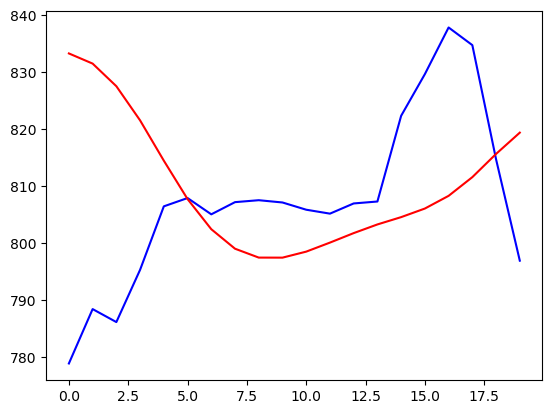

In [41]:
plt.plot(df_test['Open'],c='blue')
plt.plot(yp,c='red')